In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
#Get MNIST data from tensorflow
dataset = tf.contrib.learn.datasets.load_dataset('mnist')
X_train = dataset.train.images

X_test = dataset.test.images

print(X_train.shape, X_test.shape)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
(55000, 784) (10000, 784)


In [6]:
W = int(np.sqrt(X_train.shape[1]))

X_im_train = X_train.reshape((-1,W,W,1))
X_im_test  = X_test.reshape((-1,W,W,1))

print(X_im_train.shape, X_im_test.shape)

(55000, 28, 28, 1) (10000, 28, 28, 1)


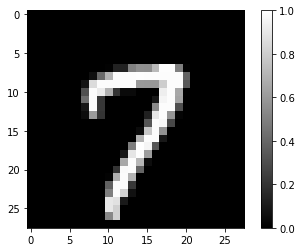

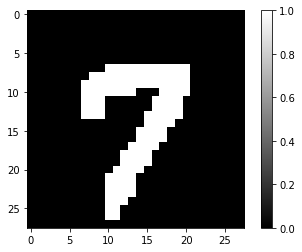

In [12]:
index = np.random.randint(X_im_train.shape[0])

x_thresh = (X_im_train[index,:,:,0]>0).astype(int)

plt.figure()
plt.imshow(X_im_train[index,:,:,0], cmap='gray')
plt.colorbar()
plt.show()
plt.close()

plt.figure()
plt.imshow(x_thresh, cmap='gray')
plt.colorbar()
plt.show()
plt.close()

In [13]:
#create position matrix for point sampling
POS_MAT = np.zeros((W,W,2))
dx      = 1.0/W

for i in range(0,W):
    for j in range(0,W):
        POS_MAT[i,j,0] = (i+0.5)*dx
        POS_MAT[i,j,1] = (j+0.5)*dx

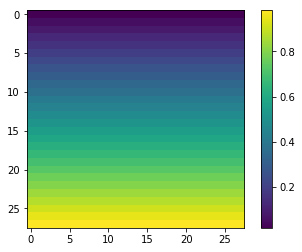

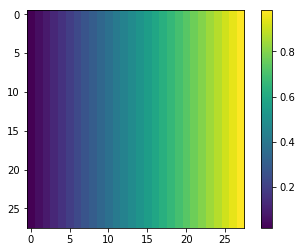

In [14]:
plt.figure()
plt.imshow(POS_MAT[:,:,0])
plt.colorbar()
plt.show()
plt.close()

plt.figure()
plt.imshow(POS_MAT[:,:,1])
plt.colorbar()
plt.show()
plt.close()

In [28]:
x_bool = (X_im_train[index,:,:,0]>0)

pos_x = POS_MAT[x_bool,0]
pos_y = POS_MAT[x_bool,1]

print(pos_x.shape, pos_y.shape)

pos_x_out = POS_MAT[~x_bool,0]
pos_y_out = POS_MAT[~x_bool,1]

print(pos_x_out.shape, pos_y_out.shape)

(118,) (118,)
(666,) (666,)


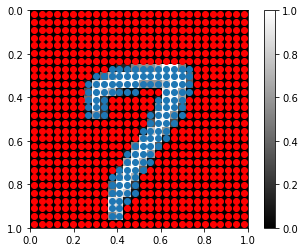

In [29]:
plt.figure()
plt.imshow(X_im_train[index,:,:,0], extent=[0,1,1,0], cmap='gray')
plt.colorbar()
plt.scatter(pos_y,pos_x)
plt.scatter(pos_y_out,pos_x_out, color='r')
plt.show()
plt.close()